# 🏡 Barcelona Airbnbs Data Analysis

## 📌 Introduction
This notebook explores Airbnb listings data to analyze **pricing, availability, and trends** in different neighborhoods.  
We will clean the dataset, perform **exploratory data analysis (EDA)**, and generate **key insights**.

### 🎯 **Objective**
- Understand **price distribution** and factors affecting pricing.
- Explore **room types** and their availability.
- Identify **popular neighborhoods** for Airbnb stays.
- Analyze **reviews and customer engagement trends**.

### 📂 **Dataset Overview**
- The dataset contains Airbnb listings with details like **price, room type, neighborhood, availability, and reviews**.
- We will **clean the data**, handle missing values, and remove duplicates before analysis.

---


In [15]:
import pandas as pd

# Load the dataset (change 'your_file.csv' to the actual file name)
df = pd.read_csv("listings.csv")

# Display the first few rows
df.head
# Check for missing values
df.isnull().sum()

# Check for duplicate rows
df.duplicated().sum()




np.int64(4)

### 🔍 **Insight**
- The dataset has **various details** about Airbnb listings, including **host information, location, price, and availability**.
- Some columns like **price, last_review, and reviews_per_month** may have **missing values** that need cleaning.


## 🛠 **Data Cleaning**
Before analysis, we must:
1. **Handle missing values** in `price`, `reviews_per_month`, and `last_review`.
2. **Remove duplicate listings** to avoid skewed results.
3. **Ensure correct data types** for numerical analysis.


In [ ]:


# Fill missing values for host_name with "Unknown"
df.loc[:, 'host_name'] = df['host_name'].fillna("Unknown")

# Replace missing prices with the median price
df.loc[:, 'price'] = df['price'].fillna(df['price'].median())

# Fill missing last_review values with "No Reviews"
df.loc[:, 'last_review'] = df['last_review'].fillna("No Reviews")

# Replace missing reviews_per_month values with 0
df.loc[:, 'reviews_per_month'] = df['reviews_per_month'].fillna(0)


# Remove duplicate rows, keeping the first occurrence
df = df.drop_duplicates()

# Reset index after removing duplicates
df = df.reset_index(drop=True)



In [12]:
# Display summary of missing values after cleaning
print(df.isnull().sum())

# Save the cleaned dataset
df.to_csv("cleaned_listings.csv", index=False)

id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64


### 🔍 **Insight**
- **Host Name**: Missing names were replaced with `"Unknown"`.
- **Price**: Filled missing values with the **median price** to maintain realistic pricing.
- **Last Review**: Replaced with `"No Reviews"` to indicate listings without reviews.
- **Reviews per Month**: Set to **0** for listings with no reviews.
- **Duplicates**: Removed to ensure **data integrity**.


# 📊 Exploratory Data Analysis (EDA)

Now that the data is cleaned, let's analyze key aspects such as:
- **Price distribution**: Understanding pricing trends.
- **Room types**: Identifying popular accommodation types.
- **Neighborhood trends**: Checking availability in different areas.
- **Review patterns**: Examining guest engagement and feedback.


## 💰 Price Distribution
Understanding how prices vary across listings can help detect **pricing trends** and **outliers**.


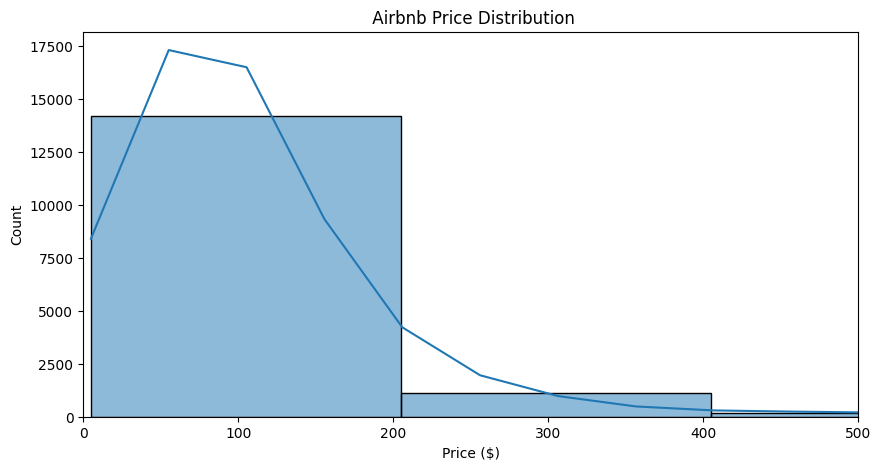

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# 📉 Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['price'], bins=50, kde=True)
plt.xlim(0, 500)  # Limit to avoid extreme outliers
plt.xlabel("Price ($)")
plt.ylabel("Count")
plt.title(" Airbnb Price Distribution")
plt.show()


### Insights from the Price Distribution

#### Most Airbnb listings are affordable  
- The highest concentration of listings is **below $200** per night, indicating that budget-friendly accommodations dominate the market.  

#### The distribution is right-skewed  
- A long tail extends towards higher prices, meaning a small number of listings are significantly more expensive.  

#### Potential outliers exist  
- Some listings have prices well above the majority, which might distort summary statistics like the **mean price**.  
